<a href="https://colab.research.google.com/github/ekolonsky/Technion-lab2/blob/main/Technion_ph_Oscillator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=24>Harmonic motion of the harmonic oscillator </font>

The experiments about harmonic motion will be performed in three laboratory sessions. In these experiments we will investigate the following phenomena:
<ol type="a">
<li> Free oscillations of a harmonic oscillator in the presence of (magnetic) friction.
<li> Forced oscillations of a harmonic oscillator without friction and the effect of resonance.
<li> Forced oscillations of a harmonic oscillator in the presence of friction, and measurement of the quality factor of the system.
</ol>

**Attention!** The lab about harmonic motion is a sequence of three sessions in which the later experiments are based on the previous one. Before performing an experiment, you have to submit the report of the previous one. You have to perform the sequence of experiments by using the same system in each lab session. In particular, you have to use the same carts and springs, otherwise you will have to measure the elastic constant of the spring each time.

**References:**
* Berkeley, Vol. 1, Chapter 7
* Berkeley, Vol. 3, Chapter. 3

## Free oscillations of the harmonic oscillator

**Goal of the experiment:** The study of the free oscillations of the oscillator harmonic in the presence of friction.

**Equipment:** Air rail, carts, springs, magnets, Kruze detectors and a computer.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Theoretical background


The Harmonic Oscillator is very important in physics. It is an example of a system in which there is periodic conversion between different types of energy (between potential and kinetic energy, between magnetic and electric energy, etc.). There are many examples of harmonic oscillators in mechanics, electromagnetism, atomic and nuclear physics, among others. In many cases in physics, when the exact description of a system is very complicated, often it is possible to simplify the analysis by making an analogy between the original system and a forced harmonic oscillator. For example, in the interaction of light and matter, one can consider the electric force due to the radiation on the electrons of the atoms as a periodic force acting on a harmonic oscillator. In the course of your studies you will meet other examples, so that an in-depth understanding of a forced harmonic oscillator will contribute greatly to understanding other physical systems.

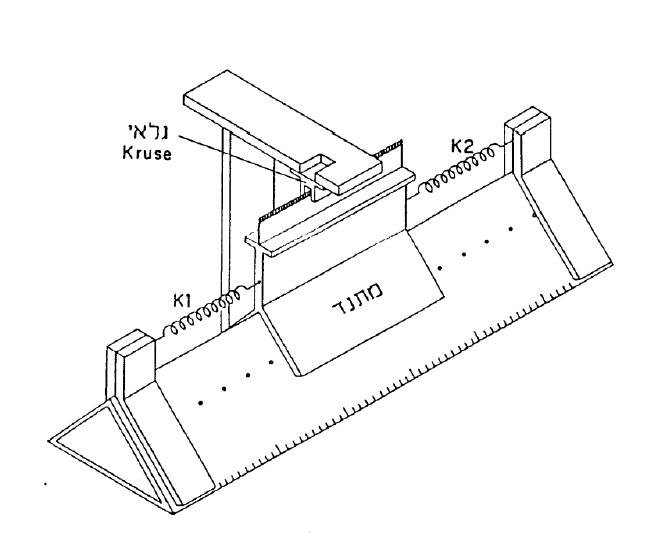

Fig.1


Two springs with elastic constants $k_1$ and $k_2$ respectively, are connected to both ends of a cart. The other ends of the springs are connected to the ends of the air rail. The cart connected to the springs is a system whose motion will be harmonic. At equilibrium, the forces acting on the cart are equal to zero. If the cart is displaced a $x$ distance from its equilibrium position, the springs will exert on it a force that will try to restore the cart to its equilibrium position. This force is proportional to the amount of displacement $x$ and its total value will be given by $-(k_1 + k_2)x$ . The minus sign means that the force is directed in the opposite direction of the displacement.

The friction force also acts on the cart. This force is proportional to the cart velocity, and in the opposite direction of the cart displacement. It can be written in the form $-{m\over \tau} {dx\over dt}$ . Here $m$ is the mass of
the cart, and $\tau$ is a parameter with units of time which characterizes the intensity of the friction force. Therefore, the general force acting on the cart is:
$$
F = m {d^2 x\over x^2} = -(k_1+k_2) x -{m\over \tau} {dx\over dt} 
\tag{1}
$$

Defining the parameter
$$
\omega_0 = \sqrt{ (k_1+k_2) /m}
\tag{2}
$$
the preceding equation can be rewritten as follows:
$$
{d^2 x \over dx^2} + {1\over\tau} {dx \over dt} + \omega_0^2 x = 0.
\tag{3}
$$

The solution of the latter differential equation is
$$
x(t) = A e^{-t/2\tau} \cos(\omega_1 t +\phi_1),
\tag{4}
$$
where
$$
\omega_1 = \sqrt{ \omega_0^2 - \left( {1\over 2 \tau}\right)^2}
\tag{5}
$$

The parameter $\omega_1$ is called the *eigen* frequency of the oscillator, $A$ is the amplitude, and $\phi_1$ is the phase (more exactly, the initial phase). The values corresponding to $A$ , and to $\phi_1$, can be found by using the initial conditions (to be specified later). One can check that the expression for $x(t)$ given above, is in fact the solution of the differential equation by just substituting $x(t)$ in it.

In the case when $\omega_0 \tau \gg 1$ , the friction is negligible, and the system oscillates with frequency $\omega_0$ , and
the amplitude $A$ of the oscillations will remain constant.

When the friction is not negligible, the amplitude of the oscillations will decrease by a factor of $e^{-1}$ in the
interval of time from $t= 0$ to $t = 2\tau$.

It is convenient to define a dimensionless parameter called Quality factor $Q=\omega_0 \tau$. When $Q$ is large,
the system will perform a large number of oscillations before its amplitude decreases significantly. In
contrast, for a small value of $Q$, the amplitude will decreases significantly after few oscillations. In the
last part of the sequence of experiments about harmonic oscillations, we will analyze the exponential
decrease in the amplitude, and calculate the quality factor.

###Friction

The motion of the cart depends on the coefficient of friction $b = m / \tau$. We can achieve a friction force
proportional to the cart velocity by attaching two small magnets to the carts. According to Lenz Law, the
field generated by the magnets in motion, will induce eddy currents in the bulk of the air rail, which in
turn will react to the magnetic field producing a net force that opposes to the motion of the magnets. This
will constitute what is called magnetic friction and the magnetic friction force will be given by the
expression $-(m/\tau) dx/dt$.


##Preliminary questions


###Question 1.

Show that Eq. (4) is the solution of Eq. (1).

####Answer 1.

Substitute solution, differentiate and simplify.

###Question 2.

Calculate the number of oscillations until the amplitude of the oscillations decreases to one half of its
initial value.

####Answer 2.
Amplitude decreases to one half when
$$
e^{-{t / 2\tau}} = 1/2
$$
therefore
$$
t = 2\tau\ln 2.
$$
Denoting $T$ - period, $n$ - number of oscillations, and having
$$
t = Tn,  \space \omega_1 T = 2\pi,$$
we get
$$
n = {\ln 2\over\pi}\tau \omega_1. 
$$

###Question 3.

Draw qualitative graphs showing the exponential decay of amplitude according to Eq. (4), for Q = 2,
and Q = 10.

####Answer 3.

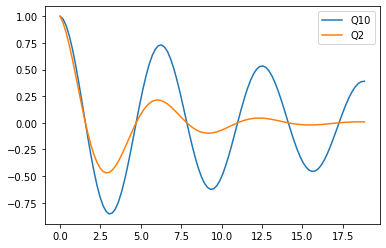

In [13]:
def x(t, Q=1, A=1, phi=0, omega=1):
  tau = Q/omega
  return A * np.exp(-t/2/tau) * np.cos(omega*t + phi)
np.vectorize(x)

interval = np.linspace(start=0, stop=6*np.pi, num=100)

plt.plot(interval, x(interval, Q=10), label='Q10')
plt.plot(interval, x(interval, Q=2), label='Q2')
plt.legend()


###Question 4.

Calculate the error $\delta\phi_1$ in terms of the errors $\delta x$ and $\delta A$, where $\phi_1 = \arccos({x/ A})$.

####Answer 4.

Denote relative error 
$$ \bar\delta x = {\delta x \over x}, \bar\delta A = {\delta A\over A}
$$
Assume that $\delta x \ll x$, $\delta A \ll A$ and $0<x\le A$, then
$$ \bar\delta\left({x\over A}\right) \approx  \bar\delta x +\bar\delta A$$
$$ \delta\left({x\over A}\right) =  {x\over A} \bar\delta\left({x\over A}\right)$$

Therefore
$$ {x\over A} \in \left[ {x\over A} \pm \delta\left({x\over A}\right)\right]
$$ 
and 
$$
\phi_1 \in  \left[ \arccos\left({x\over A} \pm \delta\left({x\over A}\right)\right)\right]
$$

In [45]:
x, dx = 0.9, 0.01
A, dA = 1, 0.01
err = (dx/x + dA/A) * x / A
phi = np.arccos(x/A)
phi_left = np.arccos(x/A  +err)
phi_right = np.arccos(x/A  - err)
print('Phi {} grad, error {:.1%}, {:.1%}'.format(phi*180/np.pi, phi_left/phi - 1, phi_right/phi - 1))


Phi 25.841932763167126 grad, error -10.1%, 9.3%


###Question 5.

Calculate the error $\delta \omega_0$ in terms of $\delta k_1$, $\delta k_2$ , and $\delta m$.

####Answer 5.

$$\delta k = \delta k_1 + \delta k_2$$

$$ \bar \delta \omega_0 = {1 \over 2} (\bar\delta k + \bar\delta m)
,$$
where $\bar\delta$ is relative error, $\delta$ is absolute error.


In [48]:
k1, k2, dk = 1000, 1200, 1
m, dm = 1, 0.001



Omega0 theory 46.9041575982343 1/s, error 0.1%


## Experiment

This is the first of a sequence of three experiments. This time we will investigate free oscillations with
and without friction. The kind of friction we will be interested in, is magnetic friction because this kind of
friction force is proportional to the velocity of the body performing the oscillations. This first experiment
has several parts. In what follows, guides for each part are provided.

### A. Measurement of the elastic constant of the springs

The measurement is based on the Hooke Law $F =- k x$. We measure the force $F$ required to elongate the spring in an amount $x$ . Therefore, the elastic constant will be simply determined by $k = |F|/ x$,
where $|F|$ is the magnitude of the force.
The procedure will be explained to you by the laboratory assistant. This part of the experiment takes less than a couple of minutes.
Calculate the proper frequency $\omega_0$.

In [49]:
# measurements here
k1, k2, dk = 1, 1, 0.001
m, dm = 1, 0.001

omega0_theor = np.sqrt((k1+k2)/m)
err_omega0_theor = 1/2 * (dk/k1 + dk/k2 + dm/m) * omega0_theor

### B. Harmonic oscillations





#### Preparing the experiment

1. Weight the cart with the attached magnets.
2. Turn on the air blower. Check that there is flow of air and calibrate the air rail horizontally. The
magnets have to be attached all the time to the carts, but in this part of the experiment you have to attach
them to the cart in such a way that they do not produce magnetic friction. Check that the cart motion is
not affected by frictional forces. Attach the springs to the cart and to the end of the air rail as shown in Figure 1. There are two different springs, one more rigid than the other. Put the detector at the center of
the cart when it is at rest, and then set the detector to zero by clicking on the counter in the display.
3. Select in the display the appropriate rate of measurement and number of points to get about 8 complete
oscillations of the cart in the graph. Check that the amplitude of the oscillation remained constant during
the 8 oscillations.

#### Quantitative experiment

1. It is important to be sure that the cart is at rest at the center of the detector before setting to zero the
counter.

2. After setting the detector to zero, put in motion the cart, click on start, check that you got the graph of
the oscillations and save the data. To put in motion the cart, just displace it from its equilibrium position
and release it from rest. This is equivalent to the initial conditions $x(t=0) = x_{max}$, and $\dot{x}(t=0) = 0.$

Note: These initial conditions are not relevant in the present experiment, but they will do in the
experiments to be performed after the present one.

3. To measure the oscillation period $T$ there is a function in the program, which measures the time taken by the cart to pass two consecutive times through the equilibrium position in the same direction. You can
select the number of measurements to be performed in the field denoted as “zero” in the interface of the program. Calculate the frequency $\omega_0 = 2 \pi /T$,   $\delta\omega_0$, and compare with the theoretical value.

4. Estimate the amplitude $A$ , and the phase $\phi_1$, together with $\delta A$, and $\delta \phi_1$.

In [50]:
# results here
T, errT = 1, .01

omega0_experim = 2 * np.pi/T
err_omega0_experim = errT/T * omega0_experim
